In [18]:
import pandas_datareader.data as web
import datetime

# 데이터 시작 날짜와 끝 날짜 설정
start = datetime.datetime(1996, 1, 1)
end = datetime.datetime.now()

# FRED에서 'FEDFUNDS' 시리즈 ID의 데이터 가져오기
fedfunds_df = web.DataReader('FEDFUNDS', 'fred', start, end)
cpi_df = web.DataReader('CPIAUCSL', 'fred', start, end)

In [19]:
cpi_df.head()

,CPIAUCSL
DATE,
1996-01-01,154.7
1996-02-01,155.0
1996-03-01,155.5
1996-04-01,156.1
1996-05-01,156.4


In [20]:
fedfunds_df.head()

,FEDFUNDS
DATE,
1996-01-01,5.56
1996-02-01,5.22
1996-03-01,5.31
1996-04-01,5.22
1996-05-01,5.24


In [21]:
import pandas as pd

merged_df = pd.merge(fedfunds_df, cpi_df, on='DATE', how='left')
merged_df


,FEDFUNDS,CPIAUCSL
DATE,,
1996-01-01,5.56,154.700
1996-02-01,5.22,155.000
1996-03-01,5.31,155.500
1996-04-01,5.22,156.100
1996-05-01,5.24,156.400
...,...,...
2025-04-01,4.33,320.321
2025-05-01,4.33,320.580
2025-06-01,4.33,321.500


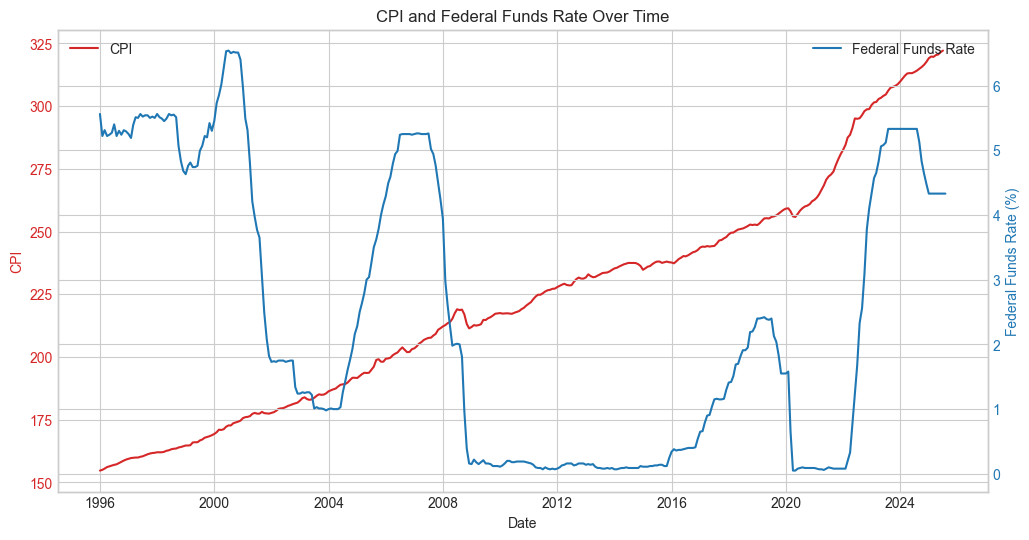

In [22]:
import datetime
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(12, 6))

# CPI 데이터 플로팅 (첫 번째 Y축)
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('CPI', color=color)
ax1.plot(merged_df.index, merged_df['CPIAUCSL'], color=color, label='CPI')
ax1.tick_params(axis='y', labelcolor=color)

# 금리 데이터 플로팅 (두 번째 Y축)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Federal Funds Rate (%)', color=color)
ax2.plot(merged_df.index, merged_df['FEDFUNDS'], color=color, label='Federal Funds Rate')
ax2.tick_params(axis='y', labelcolor=color)

# 제목 및 범례 추가
plt.title('CPI and Federal Funds Rate Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 표시
plt.show()

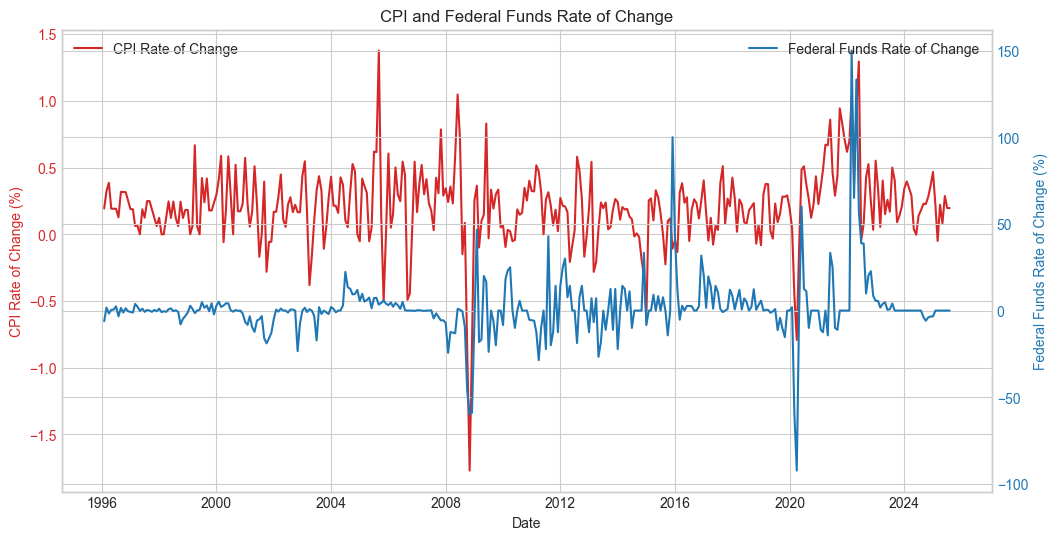

In [24]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

# 데이터 가져오기 (1996년부터 현재까지)
start = datetime.datetime(1996, 1, 1)
end = datetime.datetime.now()

# FRED에서 CPI와 금리 데이터 가져오기
df_cpi = web.DataReader('CPIAUCSL', 'fred', start, end)
df_fedfunds = web.DataReader('FEDFUNDS', 'fred', start, end)

# 변화율(pct_change) 계산 및 NaN 값 제거
df_cpi_change = df_cpi.pct_change().dropna()
df_fedfunds_change = df_fedfunds.pct_change().dropna()

# 데이터프레임 병합
merged_df = pd.merge(df_cpi_change, df_fedfunds_change, left_index=True, right_index=True, how='outer')
merged_df = merged_df.ffill()

# 시각화
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 Y축에 CPI 변화율 플로팅
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('CPI Rate of Change (%)', color=color)
ax1.plot(merged_df.index, merged_df['CPIAUCSL'] * 100, color=color, label='CPI Rate of Change')
ax1.tick_params(axis='y', labelcolor=color)

# 두 번째 Y축 (금리 변화율)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Federal Funds Rate of Change (%)', color=color)
ax2.plot(merged_df.index, merged_df['FEDFUNDS'] * 100, color=color, label='Federal Funds Rate of Change')
ax2.tick_params(axis='y', labelcolor=color)

# 제목 및 범례 추가
plt.title('CPI and Federal Funds Rate of Change')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 표시
plt.show()

In [46]:
import numpy as np

# 두 시리즈를 하나의 데이터프레임으로 결합
combined_data = pd.DataFrame({
    'cpi_change': df_cpi_change['CPIAUCSL'],
    'fedfunds_change': df_fedfunds_change['FEDFUNDS']
}).dropna()

# 공분산 계산
covariance = np.cov(combined_data['cpi_change'], combined_data['fedfunds_change'])
print("공분산 행렬:")
print(covariance)
print("-" * 30)
print(f"공분산: {covariance[0, 1]:.6f}")
print("-" * 30)

# 상관계수 계산
correlation = combined_data.corr()
print("상관관계 행렬:")
print(correlation)
print("-" * 30)
print(f"상관계수: {correlation.iloc[0, 1]:.4f}")

공분산 행렬:
[[8.21218924e-06 1.80749746e-04]
 [1.80749746e-04 3.33455026e-02]]
------------------------------
공분산: 0.000181
------------------------------
상관관계 행렬:
                 cpi_change  fedfunds_change
cpi_change         1.000000         0.345406
fedfunds_change    0.345406         1.000000
------------------------------
상관계수: 0.3454
